In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import random
import matplotlib as mpl
import math
import datetime
import numpy as np
import matplotlib
import scienceplots

In [ ]:
plt.style.use("science")
font = {"family": "normal", "weight": "bold", "size": 12}

matplotlib.rc("font", **font)

In [ ]:
def plot_results_groups(df, figure_name):

    groups = df.groupby("approach", sort=False)

    fig, axes = plt.subplots(1, len(groups), sharey=True, figsize=(6, 4))

    for i, (ax, (year, group)) in enumerate(zip(axes, groups)):
        # The rename_axis function makes the difference
        group.set_index("model").rename_axis(year)["accuracy"].plot(
            kind="bar", ax=ax, color="green", ec="k", legend=False, zorder=2, width=0.7
        )
        ax.tick_params(which="minor", length=2, width=0.3, color="gray", rotation=0)
        ax.tick_params(which="major", length=3, width=0.5, color="k", rotation=0)
        labels = group["parameters"].round(1)
        labels = [f"{x}M" for x in labels]
        ax.bar_label(ax.containers[0], labels=labels, fontsize=12)

    # axes[0].spines['right'].set_visible(False)
    # axes[1].spines['right'].set_visible(False)
    # axes[1].spines['left'].set_visible(False)
    # axes[2].spines['left'].set_visible(False)

    # ax.legend()
    fig.subplots_adjust(wspace=0)
    axes[0].set_ylabel("Accuracy (\%)", fontsize=15)
    axes[0].set_ylim(0, 1)
    axes[0].set_yticks(np.arange(0, 1.1, 0.1))

    axes[0].set_xlabel("Strawman", fontsize=13)
    axes[1].set_xlabel("Proposed", fontsize=13)
    axes[2].set_xlabel("Standalone", fontsize=13)
    # plt.tight_layout()
    plt.savefig(f"{figure_name}.pdf", dpi=300)

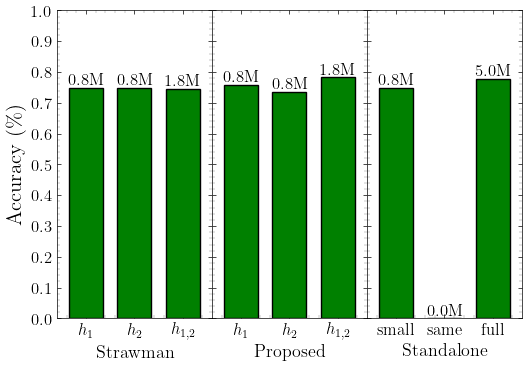

In [ ]:
cifar100_effb0_5 = [
    ["straw-man", r"$h_1$", 0.7471, 0.8],
    ["straw-man", r"$h_2$", 0.7470, 0.8],
    ["straw-man", r"$h_{1,2}$", 0.7462, 1.8],
    ["proposed", r"$h_1$", 0.7569, 0.8],
    ["proposed", r"$h_2$", 0.7359, 0.8],
    ["proposed", r"$h_{1,2}$", 0.7825, 1.8],
    ["standalone", "small", 0.7471, 0.8],
    ["standalone", "same", 0, 0],
    ["standalone", "full", 0.7763, 5],
]

cifar100_effb0_5 = pd.DataFrame(
    cifar100_effb0_5, columns=["approach", "model", "accuracy", "parameters"]
)
plot_results_groups(cifar100_effb0_5, "cifar100_effb0_5")

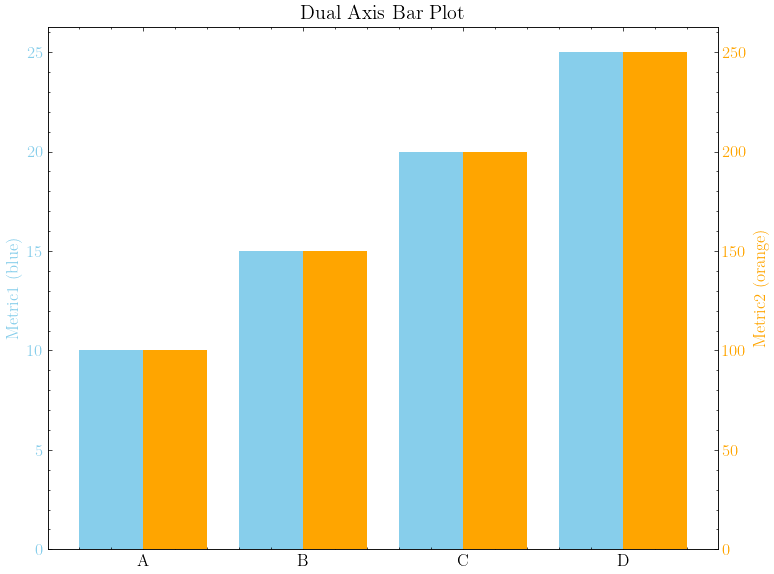

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
data = {
    "Category": ["A", "B", "C", "D"],
    "Metric1": [10, 15, 20, 25],
    "Metric2": [100, 150, 200, 250],
}

categories = data["Category"]
metric1 = data["Metric1"]
metric2 = data["Metric2"]

# Bar width and positions
bar_width = 0.4
x = np.arange(len(categories))

# Create a figure and axis objects
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot the first bar plot (Metric1)
bar1 = ax1.bar(x - bar_width / 2, metric1, bar_width, label="Metric1", color="skyblue")
ax1.set_ylabel("Metric1 (blue)", color="skyblue")
ax1.tick_params(axis="y", labelcolor="skyblue")

# Create a twin axis for the second y-axis
ax2 = ax1.twinx()

# Plot the second bar plot (Metric2)
bar2 = ax2.bar(x + bar_width / 2, metric2, bar_width, label="Metric2", color="orange")
ax2.set_ylabel("Metric2 (orange)", color="orange")
ax2.tick_params(axis="y", labelcolor="orange")

# Add category labels
ax1.set_xticks(x)
ax1.set_xticklabels(categories)

# Title and layout adjustments
plt.title("Dual Axis Bar Plot")
fig.tight_layout()

# Show the plot
plt.show()

In [ ]:
def plot_results_weights(df, figure_name):

    fig, ax = plt.subplots(figsize=(4, 3))

    sns.lineplot(
        data=df,
        x="ratio_n12_n1",
        y="accuracy_12",
        ax=ax,
        color="black",
        zorder=1,
        marker="o",
        label="$h_{\{1,2\}}$",
    )
    sns.lineplot(
        data=df,
        x="ratio_n12_n1",
        y="accuracy_1",
        ax=ax,
        color="blue",
        zorder=1,
        marker="s",
        label="$h_{\{1\}}$",
    )
    sns.lineplot(
        data=df,
        x="ratio_n12_n1",
        y="accuracy_2",
        ax=ax,
        color="green",
        zorder=1,
        marker="D",
        label="$h_{\{2\}}$",
    )

    ax.set_xlabel("$\lambda_{\{1,2\}}/\lambda_{\{1\}}$", fontsize=15)

    ax.set_ylabel("Accuracy (Top-1)", fontsize=15)
    ax.set_ylim(0, 0.8)
    ax.set_yticks(np.arange(0, 0.9, 0.1))
    ax.set_xticks(np.arange(1, 2.5, 0.5))
    ax.set_xlim(1, 2)
    # plt.tight_layout()
    plt.savefig(f"{figure_name}.pdf", dpi=300, transparent=True)

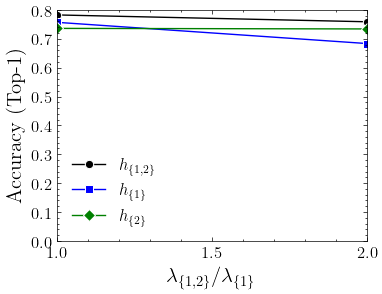

In [ ]:
cifar100_effb0_5_weights = [
    [0.33, 0.34, 1, 75.69, 73.59, 78.25],
    [0.25, 0.5, 2, 68.340, 73.40, 75.88],
    [0.2, 0.6, 3, 67.52, 72.62, 76.01],
    [0.14, 0.72, 5, 60.45, 72.57, 75.11],
    [0.08, 0.84, 10, 52.44, 71.80, 75.05],
]


df = pd.DataFrame(
    cifar100_effb0_5_weights,
    columns=[
        "weight_n1",
        "weight_n12",
        "ratio_n12_n1",
        "accuracy_1",
        "accuracy_2",
        "accuracy_12",
    ],
)

df["accuracy_1"] /= 100
df["accuracy_2"] /= 100
df["accuracy_12"] /= 100

plot_results_weights(df, "cifar100_effb0_5_weights")

In [ ]:
def plot_accuracy_vs_parameters(
    df, figure_name, full_size, full_acc, max_acc, adjustments
):
    df["parameters"] /= full_size
    df["parameters"] *= 100

    fig, ax = plt.subplots(figsize=(4, 3))
    sns.lineplot(
        data=df,
        x="parameters",
        y="accuracy_12",
        ax=ax,
        color="black",
        zorder=1,
        marker="o",
        label="$h_{\{1,2\}}$",
    )
    sns.lineplot(
        data=df,
        x="parameters",
        y="accuracy_1",
        ax=ax,
        color="blue",
        zorder=1,
        marker="s",
        label="$h_{\{1\}}$",
    )
    sns.lineplot(
        data=df,
        x="parameters",
        y="accuracy_2",
        ax=ax,
        color="green",
        zorder=1,
        marker="D",
        label="$h_{\{2\}}$",
    )

    plt.axhline(y=full_acc, color="red", linestyle="--", label="Original")
    # plt.text(x=0.25, y=0.88, s='Original', ha='center', va='bottom', transform=plt.gca().transAxes, color='red', fontsize=12)

    for i, (model_name, x_l, y_l) in enumerate(
        zip(df["model_name"], df["parameters"], df["accuracy_12"])
    ):
        plt.text(
            x_l + adjustments[i][0],
            y_l + adjustments[i][1],
            "$\mathcal{B}$" + f"{i+1}",
            fontsize=12,
            color="k",
        )

    ax.legend(fontsize=12)
    ax.set_xlabel("Parameters ($\{h_{\mathcal{S}}\}$/Original) \%", fontsize=15)
    ax.set_ylabel("Accuracy (Top-1)", fontsize=15)
    ax.set_ylim(0, max_acc)
    # ax.set_yticks(np.arange(0,max_acc+0.1, 0.1))
    ax.set_xlim(0, 150)
    plt.savefig(f"{figure_name}.pdf", dpi=300)
    # sns.despine()
    plt.tight_layout()

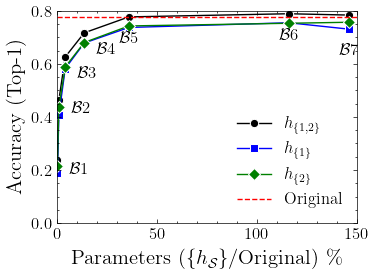

In [ ]:
effnet_cifar_values = [
    ["B1", 0.011, 18.73, 21.62, 23.65],  # C1
    ["B2", 0.048, 40.70, 43.62, 46.34],  # C2
    ["B3", 0.208, 58.24, 58.85, 62.61],  # C3
    ["B4", 0.683, 67.85, 68.04, 71.69],  # C4
    ["B5", 1.8, 73.71, 74.28, 77.69],  # C5
    ["B6", 5.8, 75.48, 75.29, 78.88],  # C6
    ["B7", 7.3, 73.08, 75.67, 78.38],  # C7
]

df = pd.DataFrame(
    effnet_cifar_values,
    columns=["model_name", "parameters", "accuracy_1", "accuracy_2", "accuracy_12"],
)
df["accuracy_1"] /= 100
df["accuracy_2"] /= 100
df["accuracy_12"] /= 100

adjustments = [
    (6, -0.05),
    (6, -0.05),
    (6, -0.08),
    (6, -0.08),
    (-5, -0.1),
    (-5, -0.1),
    (-5, -0.15),
]

plot_accuracy_vs_parameters(
    df, "effnet_cifar_ensemble_accuracy_vs_parameters", 5, 0.7763, 0.8, adjustments
)

In [ ]:
vit_ensemble_values = [
    [15.9, 0.506, 0.4667, 0.4644],
    [30, 0.5937, 0.5652, 0.5583],
    [44.3, 0.6103, 0.5744, 0.5860],
    [58, 0.6167, 0.5892, 0.5908],
    [72, 0.625, 0.596, 0.5909],
    [86, 0.6295, 0.6034, 0.603],
]

df = pd.DataFrame(
    vit_ensemble_values,
    columns=["parameters", "accuracy_12", "accuracy_1", "accuracy_2"],
)
plot_accuracy_vs_parameters(df, "vit_ensemble_accuracy_vs_parameters", 86, 0.6164, 0.7)

TypeError: plot_accuracy_vs_parameters() missing 1 required positional argument: 'adjustments'

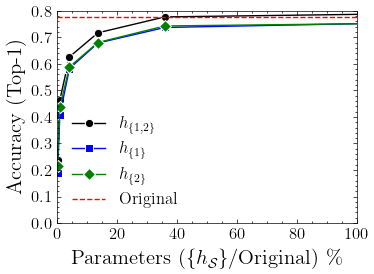

In [356]:
model_name_final = {
    "Predict": "Small",
    "PredictOriginal": "Original",
    "PredictFull": "Ensemble-Local",
    "PredictForward": "MEL",
    "PredictSplit": "Split (Original)",
}

In [ ]:
def load_data(model_name, EXECUTION_PROVIDER, experiment_name):
    df = pd.read_csv(
        f"../system/{model_name}_{EXECUTION_PROVIDER}/obelix190_client_{experiment_name}_results.csv"
    )
    df["experiment_name"] = model_name_final[experiment_name]
    if experiment_name == "PredictForward":
        df["Time"] = df[["Time2", "Time2"]].max(axis=1)
        del df["Time2"]
        del df["Time1"]
    # Load your data here
    # For example, you can use pandas to read a CSV file
    # df = pd.read_csv("your_data.csv")
    return df

In [5]:
load_data("EFFNETB0_C5_CIFAR", "CUDA", "Predict")

,Time,experiment_name
0,0.016464,small
1,0.011446,small
2,0.011453,small
3,0.011612,small
4,0.011851,small
...,...,...
995,0.012254,small
996,0.012299,small
997,0.012226,small
998,0.012259,small


In [6]:
load_data("EFFNETB0_C5_CIFAR", "CUDA", "PredictForward")

,experiment_name,Time
0,MEL,0.283403
1,MEL,0.014290
2,MEL,0.014204
3,MEL,0.014432
4,MEL,0.014655
...,...,...
995,MEL,0.014328
996,MEL,0.014341
997,MEL,0.014454
998,MEL,0.014394


In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Sample data
# data = {
#     "Category": ["A", "B", "C", "D"],
#     "Metric1": [10, 15, 20, 25],
#     "Metric2": [100, 150, 200, 250],
# }

# categories = data["Category"]
# metric1 = data["Metric1"]
# metric2 = data["Metric2"]

# # Bar width and positions
# bar_width = 0.4
# x = np.arange(len(categories))

# # Create a figure and axis objects
# fig, ax1 = plt.subplots(figsize=(8, 6))

# # Plot the first bar plot (Metric1)
# bar1 = ax1.bar(x - bar_width / 2, metric1, bar_width, label="Metric1", color="skyblue")
# ax1.set_ylabel("Metric1 (blue)", color="skyblue")
# ax1.tick_params(axis="y", labelcolor="skyblue")

# # Create a twin axis for the second y-axis
# ax2 = ax1.twinx()

# # Plot the second bar plot (Metric2)
# bar2 = ax2.bar(x + bar_width / 2, metric2, bar_width, label="Metric2", color="orange")
# ax2.set_ylabel("Metric2 (orange)", color="orange")
# ax2.tick_params(axis="y", labelcolor="orange")

# # Add category labels
# ax1.set_xticks(x)
# ax1.set_xticklabels(categories)

# # Title and layout adjustments
# plt.title("Dual Axis Bar Plot")
# fig.tight_layout()

# # Show the plot
# plt.show()
accuracy = [0.7763, 0.7769, 0.7371]

# 73.71, 74.28, 77.69


def plot_response_time(model_name, EXECUTION_PROVIDER):
    bar_width = 0.4
    dfs = []
    for i, experiment in enumerate(["PredictSplit", "PredictForward", "Predict"]):
        df = load_data(model_name, EXECUTION_PROVIDER, experiment)
        df["col1"] = i - bar_width / 2
        df["col2"] = i + bar_width / 2
        df["Accuracy"] = accuracy[i]
        dfs.append(df)
    df = pd.concat(dfs)
    df["Time"] *= 1000
    print(df.shape)
    fig, ax = plt.subplots(figsize=(4, 3))
    x = np.arange(3)

    sns.barplot(
        data=df,
        x="col1",
        y="Time",
        width=bar_width,
        ax=ax,
        color="lightgray",
        ec="k",
        capsize=0.2,
        native_scale=True,
        label="Time",
        err_kws={"color": "black", "linewidth": 0.7},
    )

    ax_ = ax.twinx()
    sns.barplot(
        data=df,
        x="col2",
        y="Accuracy",
        ax=ax_,
        color="green",
        ec="k",
        width=bar_width,
        label="Accuracy",
        native_scale=True,
        errorbar=None,
    )
    ax.set_ylim(0, 25)
    ax.set_yticks(np.arange(0, 30, 5))
    # ax.set_title(f"{model_name} {EXECUTION_PROVIDER}")
    ax.set_ylabel("Inference Time (ms)")
    ax.set_xlabel("")
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(["Split\n(Original)", "MEL\n(Normal)", "Upstream\n(Failover)"])
    ax_.set_ylabel("Accuracy (Top-1)")
    ax_.set_ylim(0.7, 0.8)
    ax.tick_params(which="minor", length=2, width=0.3, color="gray", rotation=0)
    ax.tick_params(which="major", length=3, width=0.5, color="k", rotation=0)
    handles1, labels1 = ax.get_legend_handles_labels()
    handles2, labels2 = ax_.get_legend_handles_labels()
    ax.legend(
        handles1 + handles2, labels1 + labels2, loc="upper right", ncol=2, fontsize=12
    )
    ax_.legend_.remove()
    fig.savefig(f"{model_name}_{EXECUTION_PROVIDER}_response_time.pdf", dpi=300)

(3000, 5)


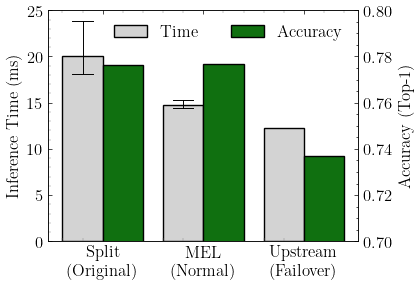

In [141]:
plot_response_time("EFFNETB0_C5_CIFAR", "CUDA")

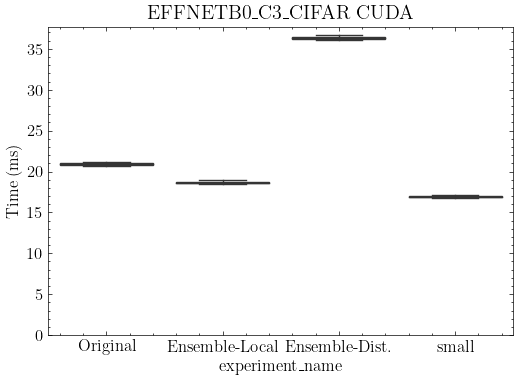

In [ ]:
# plot_response_time("EFFNETB0_C3_CIFAR", "CUDA")

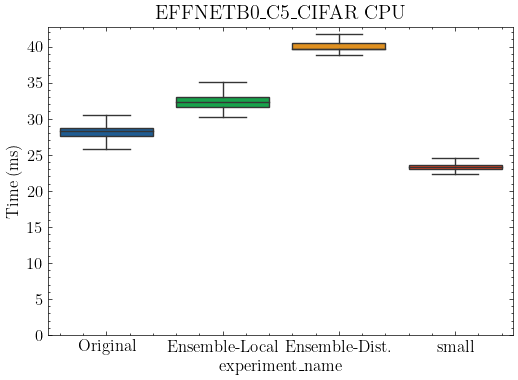

In [ ]:
# plot_response_time("EFFNETB0_C5_CIFAR", "CPU")

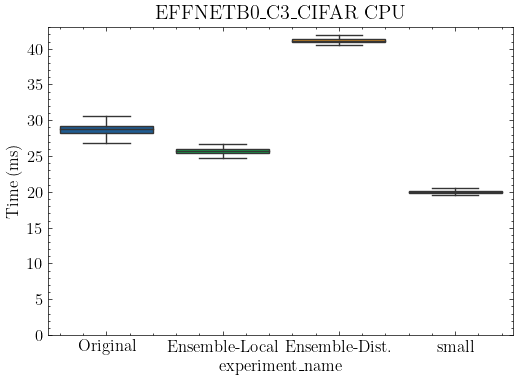

In [ ]:
# plot_response_time("EFFNETB0_C3_CIFAR", "CPU")

In [ ]:
local_name_final = {
    # "forward": "ensemble",
    "full": "ensemble",
    "original": "original",
    "single1": "single",
}


def load_data_local(model_name, experiment_name, EXECUTION_PROVIDER):
    df = pd.read_csv(
        f"../system/obelix_local/obelix190_onnx_results_{model_name}_{experiment_name}_{EXECUTION_PROVIDER}.csv"
    )
    df["experiment_name"] = local_name_final[experiment_name]
    # Load your data here
    # For example, you can use pandas to read a CSV file
    # df = pd.read_csv("your_data.csv")
    return df

In [212]:
load_data_local("Ens_Effnet_CIFAR100_C5", "full", "CUDAExecutionProvider")

,Time(s),experiment_name
0,0.004842,ensemble
1,0.003716,ensemble
2,0.003706,ensemble
3,0.003711,ensemble
4,0.003695,ensemble
...,...,...
995,0.003676,ensemble
996,0.003686,ensemble
997,0.003671,ensemble
998,0.003675,ensemble


In [ ]:
def plot_local_time(model_name, EXECUTION_PROVIDER):
    dfs = []
    for experiment in ["original", "full", "single1"]:
        dfs.append(load_data_local(model_name, experiment, EXECUTION_PROVIDER))
    df = pd.concat(dfs)
    df["Time"] = df["Time(s)"] * 1000
    fig, ax = plt.subplots(figsize=(6, 4))

    sns.boxplot(data=df, x="experiment_name", y="Time", ax=ax, showfliers=False)
    ax.set_ylim(0)
    ax.set_title(f"{model_name} {EXECUTION_PROVIDER}")
    ax.set_ylabel("Time (ms)")

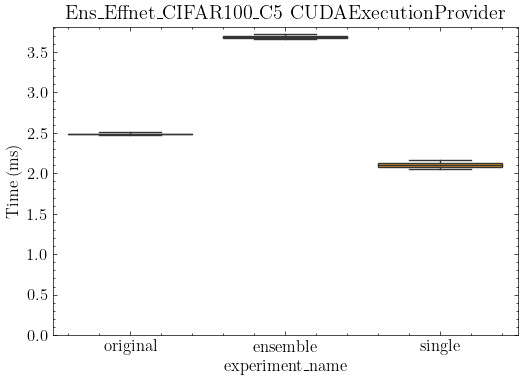

In [208]:
plot_local_time("Ens_Effnet_CIFAR100_C5", "CUDAExecutionProvider")

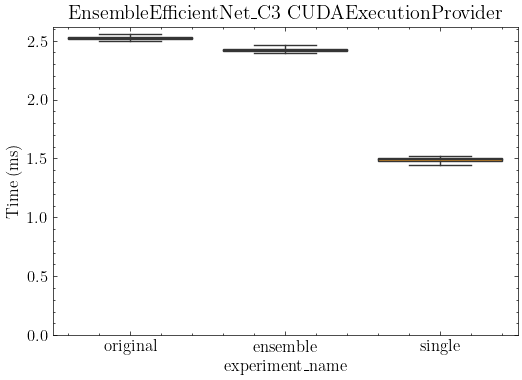

In [209]:
plot_local_time("EnsembleEfficientNet_C3", "CUDAExecutionProvider")

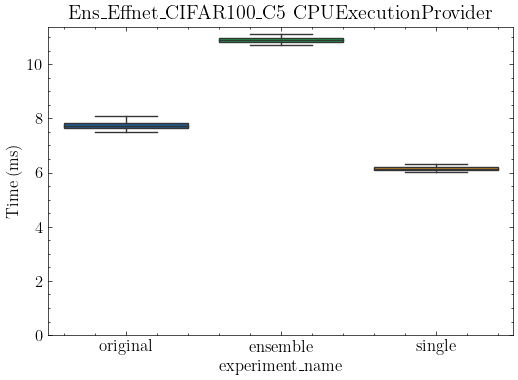

In [210]:
plot_local_time("Ens_Effnet_CIFAR100_C5", "CPUExecutionProvider")

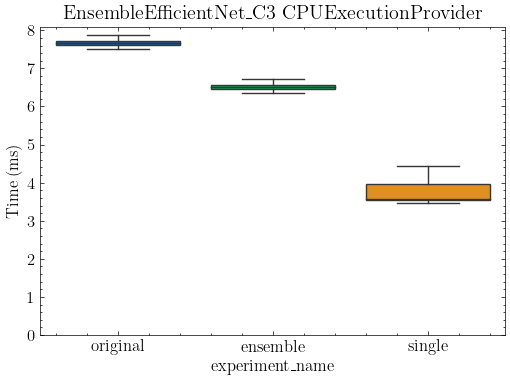

In [211]:
plot_local_time("EnsembleEfficientNet_C3", "CPUExecutionProvider")

In [385]:
def load_data_local(architecture, blocks, head, experiment_name, EXECUTION_PROVIDER):
    df = pd.read_csv(
        f"../system/local_results/obelix190_{architecture}_{blocks}_{head}_{experiment_name}_{EXECUTION_PROVIDER}.csv"
    )
    df["model"] = f"{architecture}_{blocks}_{head}"
    if experiment_name == "single":
        df["experiment_name"] = "Small"
    elif experiment_name == "full":
        df["experiment_name"] = "MEL"
    df["blocks"] = blocks
    df["head"] = head
    df["Time"] = df["Time(s)"] * 1000
    # Load your data here
    # For example, you can use pandas to read a CSV file
    # df = pd.read_csv("your_data.csv")
    return df

In [386]:
# obelix190_EENetB0_1_FC_full_CPUExecutionProvider
# obelix190_EENetB0_1_full_full_CPUExecutionProvider
load_data_local("EENetB0", 1, "FC", "full", "CPUExecutionProvider")

,Time(s),model,experiment_name,blocks,head,Time
0,0.002819,EENetB0_1_FC,MEL,1,FC,2.819477
1,0.002410,EENetB0_1_FC,MEL,1,FC,2.410240
2,0.002464,EENetB0_1_FC,MEL,1,FC,2.464314
3,0.002412,EENetB0_1_FC,MEL,1,FC,2.412393
4,0.002364,EENetB0_1_FC,MEL,1,FC,2.364132
...,...,...,...,...,...,...
995,0.001756,EENetB0_1_FC,MEL,1,FC,1.755650
996,0.001810,EENetB0_1_FC,MEL,1,FC,1.809558
997,0.001808,EENetB0_1_FC,MEL,1,FC,1.808228
998,0.002250,EENetB0_1_FC,MEL,1,FC,2.249624


In [387]:
load_data_local("EENetB0", 1, "FC", "full", "CPUExecutionProvider")

,Time(s),model,experiment_name,blocks,head,Time
0,0.002819,EENetB0_1_FC,MEL,1,FC,2.819477
1,0.002410,EENetB0_1_FC,MEL,1,FC,2.410240
2,0.002464,EENetB0_1_FC,MEL,1,FC,2.464314
3,0.002412,EENetB0_1_FC,MEL,1,FC,2.412393
4,0.002364,EENetB0_1_FC,MEL,1,FC,2.364132
...,...,...,...,...,...,...
995,0.001756,EENetB0_1_FC,MEL,1,FC,1.755650
996,0.001810,EENetB0_1_FC,MEL,1,FC,1.809558
997,0.001808,EENetB0_1_FC,MEL,1,FC,1.808228
998,0.002250,EENetB0_1_FC,MEL,1,FC,2.249624


In [388]:
def plot_local_accuracy(architecture, blocks, head, EXECUTION_PROVIDER, y_lim=16):
    dfs = []
    latency = 0
    for block in range(1, blocks + 1):
        for experiment_name in ["single", "full"]:
            try:
                df = load_data_local(
                    architecture, block, head, experiment_name, EXECUTION_PROVIDER
                )
                if experiment_name == "single":
                    latency = df["Time"].mean()
                dfs.append(df)
            except:
                pass

    df = pd.concat(dfs)
    fig, ax = plt.subplots(figsize=(4, 3))

    # sns.boxplot(data=df, x="blocks", y="Time", ax=ax, showfliers=False, hue="experiment_name", palette="Set2")
    sns.barplot(
        data=df,
        x="blocks",
        y="Time",
        ax=ax,
        hue="experiment_name",
        palette=["gray", "green"],
        ec="k",
    )
    plt.axhline(y=latency, color="red", linestyle="--", label="Original")

    ax.set_ylim(0)
    # ax.set_title(f"{architecture} {EXECUTION_PROVIDER}")
    ax.set_ylabel("Time (ms)", fontsize=18)
    ax.set_xlabel("Blocks", fontsize=18)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    ax.set_ylim(0, y_lim)
    if y_lim > 100:
        ax.set_yticks(np.arange(0, y_lim + 1, 25))
    elif y_lim > 50:
        ax.set_yticks(np.arange(0, y_lim + 1, 10))
    elif y_lim > 20:
        ax.set_yticks(np.arange(0, y_lim + 1, 5))
    elif y_lim > 10:
        ax.set_yticks(np.arange(0, y_lim + 1, 2))
    else:
        ax.set_yticks(np.arange(0, y_lim + 1, 1))
    ax.legend(title=None, fontsize=12)
    plt.tight_layout()
    plt.savefig(f"{architecture}_{head}_{EXECUTION_PROVIDER[:3]}_local.pdf", dpi=300)
    return df.groupby(["experiment_name", "blocks"])["Time"].mean()

experiment_name  blocks
MEL              1          2.054642
                 2          4.912439
                 3          6.514134
                 4          8.996650
                 5         10.937263
                 6         14.727401
                 7         15.388063
Small            1          1.337458
                 2          2.975287
                 3          3.713488
                 4          4.609368
                 5          6.235079
                 6          7.739980
                 7          8.110365
Name: Time, dtype: float64

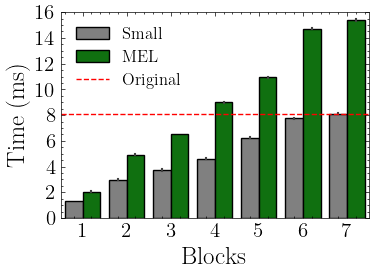

In [389]:
plot_local_accuracy("EENetB0", 7, "FC", "CPUExecutionProvider")

experiment_name  blocks
MEL              1         0.764846
                 2         1.793580
                 3         2.420272
                 4         2.954702
                 5         3.693072
                 6         4.529396
                 7         4.770051
Small            1         1.004811
                 2         1.286812
                 3         1.503130
                 4         1.747343
                 5         2.138398
                 6         2.560183
                 7         2.683248
Name: Time, dtype: float64

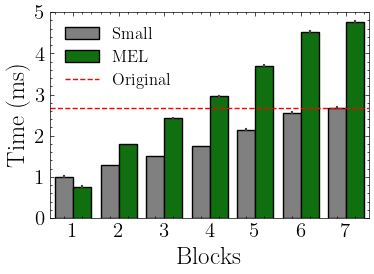

In [390]:
plot_local_accuracy("EENetB0", 7, "FC", "CUDAExecutionProvider", y_lim=5)

experiment_name  blocks
MEL              1          4.932801
                 2          7.550747
                 3         16.766930
                 4         23.799762
Small            1          2.525960
                 2          4.739707
                 3          9.179308
                 4         12.290773
Name: Time, dtype: float64

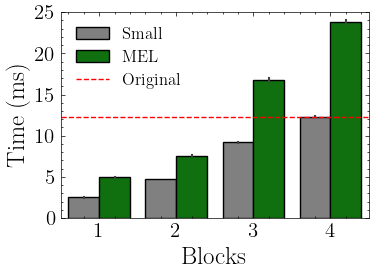

In [391]:
plot_local_accuracy("ERNet50", 4, "FC", "CPUExecutionProvider", y_lim=25)

experiment_name  blocks
MEL              1          2.770377
                 2          5.087817
                 3          8.396621
                 4         11.036795
Small            1          2.979073
                 2          3.572864
                 3          4.818577
                 4          5.959509
Name: Time, dtype: float64

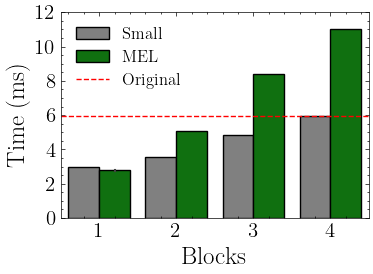

In [392]:
plot_local_accuracy("ERNet50", 4, "FC", "CUDAExecutionProvider", y_lim=12)

experiment_name  blocks
MEL              1          11.993233
                 2          21.793637
                 3          32.878957
                 4          41.167636
                 5          51.141537
                 6          67.815845
                 12        119.631348
Small            1           7.428688
                 2          13.310766
                 3          22.736466
                 4          23.103736
                 5          29.887932
                 6          33.248554
                 12         61.842724
Name: Time, dtype: float64

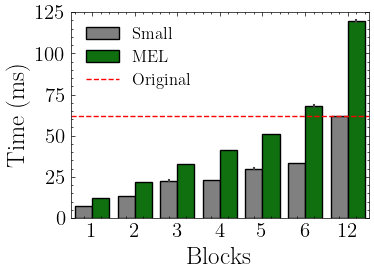

In [393]:
plot_local_accuracy("EViT", 12, "FC", "CPUExecutionProvider", y_lim=125)

experiment_name  blocks
MEL              1          2.427220
                 2          4.210684
                 3          6.048841
                 4          7.826517
                 5          9.677154
                 6         11.491929
                 12        22.522359
Small            1          1.508880
                 2          2.362545
                 3          3.265667
                 4          4.153589
                 5          5.103787
                 6          5.947061
                 12        11.443807
Name: Time, dtype: float64

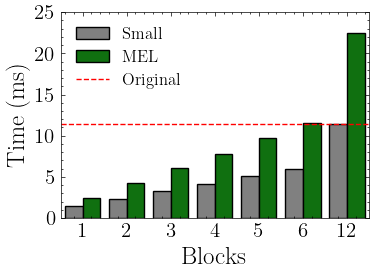

In [394]:
plot_local_accuracy("EViT", 12, "FC", "CUDAExecutionProvider", y_lim=25)

experiment_name  blocks
MEL              1          3.283546
                 2          4.851394
                 3          6.433985
                 4          8.130083
                 5          9.705284
                 6         11.401452
Small            1          1.844257
                 2          2.549369
                 3          3.351636
                 4          4.101605
                 5          4.865788
                 6          5.652129
Name: Time, dtype: float64

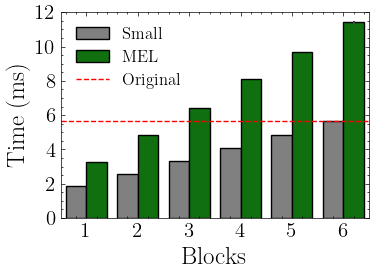

In [395]:
plot_local_accuracy("EDeepSp", 6, "FC", "CUDAExecutionProvider", y_lim=12)

experiment_name  blocks
MEL              1          3.267838
                 2          4.847923
                 3          8.105476
                 4          9.661181
                 5          9.318341
                 6         10.853001
Small            1          1.467836
                 2          2.340093
                 3          3.800328
                 4          5.003277
                 5          4.749826
                 6          5.495587
Name: Time, dtype: float64

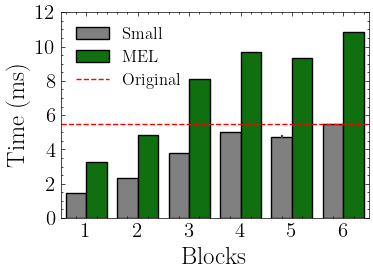

In [396]:
plot_local_accuracy("EDeepSp", 6, "FC", "CPUExecutionProvider", y_lim=12)

In [326]:
def load_rpc_data(architecture, blocks, head_type, experiment_name):
    df = pd.read_csv(
        f"../system/rpc_results/obelix190_client_{experiment_name}_{architecture}_{blocks}_{head_type}_results.csv"
    )
    df["experiment_name"] = model_name_final[experiment_name]
    df["blocks"] = blocks
    if experiment_name == "PredictForward":
        df["Time"] = df[["Time2", "Time2"]].max(axis=1)
        del df["Time2"]
        del df["Time1"]
    df["Time"] = df["Time"] * 1000
    # Load your data here
    # For example, you can use pandas to read a CSV file
    # df = pd.read_csv("your_data.csv")
    return df

In [327]:
load_rpc_data("EENETB0", 1, "FC", "Predict")

,Time,experiment_name,blocks
0,12.888773,small,1
1,9.109528,small,1
2,9.242504,small,1
3,9.239559,small,1
4,9.504785,small,1
...,...,...,...
995,9.798149,small,1
996,9.855652,small,1
997,9.931157,small,1
998,9.777881,small,1


In [397]:
def plot_rpc_latency(architecture, blocks, head, experiment_name, y_lim):
    dfs = []
    latency = 0
    for block in range(1, blocks + 1):
        for experiment_name in ["Predict", "PredictForward"]:
            try:
                df = load_rpc_data(architecture, block, head, experiment_name)
                if experiment_name == "Predict":
                    latency = df["Time"].mean()
                dfs.append(df)
            except:
                pass
    df = pd.concat(dfs)
    fig, ax = plt.subplots(figsize=(4, 3))
    
    
    sns.barplot(
        data=df,
        x="blocks",
        y="Time",
        ax=ax,
        hue="experiment_name",
        palette=["gray", "green"],
        ec="k",
    )
    plt.axhline(y=latency, color="red", linestyle="--", label="Original")
    
    ax.set_ylim(0)
    # ax.set_title(f"{architecture} {EXECUTION_PROVIDER}")
    ax.set_ylabel("Time (ms)", fontsize=18)
    ax.set_xlabel("Blocks", fontsize=18)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    ax.set_ylim(0, y_lim)
    if y_lim > 100:
        ax.set_yticks(np.arange(0, y_lim + 1, 25))
    elif y_lim > 50:
        ax.set_yticks(np.arange(0, y_lim + 1, 10))
    elif y_lim > 20:
        ax.set_yticks(np.arange(0, y_lim + 1, 5))
    elif y_lim > 10:
        ax.set_yticks(np.arange(0, y_lim + 1, 2))
    else:
        ax.set_yticks(np.arange(0, y_lim + 1, 1))
    ax.legend(title=None, fontsize=12)
    plt.tight_layout()
    plt.savefig(f"{architecture}_{head}_rpc.pdf", dpi=300)

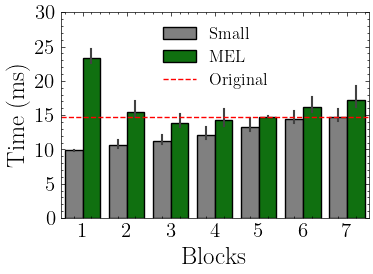

In [398]:
plot_rpc_latency("EENETB0", 7, "FC", "Predict", y_lim=30)

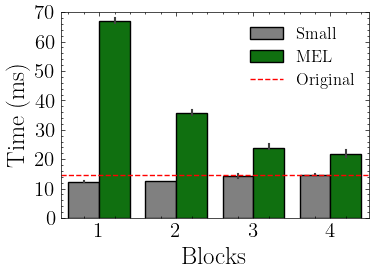

In [399]:
plot_rpc_latency("ERNet50", 7, "FC", "Predict", y_lim=70)

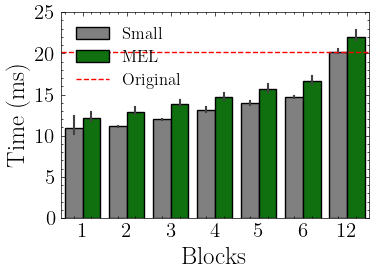

In [400]:
plot_rpc_latency("EViT", 12, "FC", "Predict", y_lim=25)

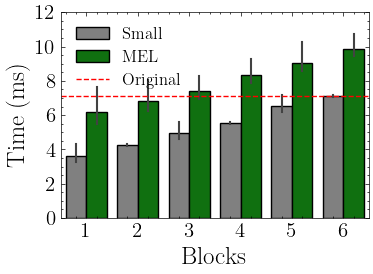

In [401]:
plot_rpc_latency("EDeepSp", 7, "FC", "Predict", y_lim=12)